# Problema 3: Mejoramiento de vehículos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## 1. Análisis de datos

(500, 1)
(500, 1)


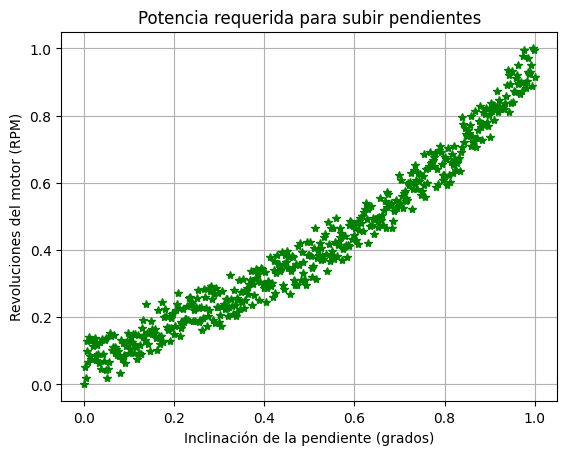

In [2]:
#Cargar datos
data = np.load('datos/datos_p3.npy')

#Extraer informacion
x = data[:, 0]
y = data[:, 1]

#print(x.shape)
#print(y.shape)
x=np.reshape(x,(500,1))
y=np.reshape(y,(500,1))
print(x.shape)
print(y.shape)


#Normalizar
x=x-np.min(x)
x=x/np.max(x)
y=y-np.min(y)
y=y/np.max(y)

#Graficar valores
plt.title("Potencia requerida para subir pendientes")
plt.ylabel("Revoluciones del motor (RPM)")
plt.xlabel("Inclinación de la pendiente (grados)")
plt.plot(x, y, '*', color='g');
plt.grid()
plt.show()

# 2. Funciones Auxiliares

In [3]:
#sigmoide
def sigmoid(x):
    y=1.0/(1.0+np.exp(-x))
    return y


#Error medio cuadratico
def emc(y, yd):
    e=0.5*np.power(y-yd,2)
    return e

# 3. Modelo

In [4]:
#Crear clase representativa de un perceptron multicapa
class mlp:
    
    #Crear constructor
    def __init__(self, ne, no, ns, d): #ne=n de entrada, no= n capa oculta y ns=n capa salida, d es el tamaño de la entrada
        
        #capa de entrada
        self.w1=np.random.rand(ne,d)-0.5#columnas son las denditras que son las entradas y las filas son las salidas
        self.b1=np.random.rand(ne,1)-0.5
        
        #capa oculta
        self.w2=np.random.rand(no,ne)-0.5#columnas son las denditras que son las entradas y las filas son las salidas
        self.b2=np.random.rand(no,1)-0.5
        
        #capa salida
        self.w3=np.random.rand(ns,no)-0.5#columnas son las denditras que son las entradas y las filas son las salidas
        self.b3=np.random.rand(ns,1)-0.5
        
    #Funcion forward (Paso hacia adelante)
    def forward(self, x):
        
        #capa de entrada
        h1=np.dot(self.w1,x)+self.b1
        y1=sigmoid(h1)
        
        
        #capa oculta
        h2=np.dot(self.w2,y1)+self.b2
        y2=sigmoid(h2)
        
        #capa de salida
        h3=np.dot(self.w3,y2)+self.b3
        ym=sigmoid(h3)
        
        return ym
    
    #Funcion de entrenamiento
    def train(self, x, y, Lr, epoch):
        
        #inicializar el error de la epoca
        self.e=np.zeros(epoch)
        
        
        #Lazo de epocas
        for i in range(epoch):
            
            #Lazo de datos
            for j in range(x.shape[0]):
                
                
                #tomar entrada i (redimensionar a dx1)
                x_in=x[j,:].reshape([self.w1.shape[1],1]) #(d,1)
                
                #capa de entrada
                h1=np.dot(self.w1,x_in)+self.b1 #(ne,1)
                y1=sigmoid(h1)#(ne,1)


                #capa oculta
                h2=np.dot(self.w2,y1)+self.b2#(no,1)
                y2=sigmoid(h2)#(no,1)

                #capa de salida

                h3=np.dot(self.w3,y2)+self.b3#(ns,1)
                ym=sigmoid(h3)#(ns,1)
                
                #calcular error del dato 1
                self.e[i]=self.e[i]+emc(ym,y[j])
                
                
                
                ##Definir gradientes
                
                
                #a) gradientes del error
                de_ym=(ym-y[j])#(ns,1)
                
                
                #b) capa de salida
                dym_h3=ym*(1-ym)#derivada de la sigmoide (ns,1)
                dh3_w3=y2#(no,1)
                dh3_b3=1#(1)
                dh3_y2=self.w3#(ns,no)
                
                
                #c)capa oculta
                dy2_h2=y2*(1-y2)#derivada de la sigmoide (no,1)
                dh2_w2=y1#(ne,1)
                dh2_b2=1#(1)
                dh2_y1=self.w2#(no,ne)
                
                #capa de entrada
                dy1_h1=y1*(1-y1)#(ne,1)
                dh1_w1=x_in#(d,1)
                dh1_b1=1#(1)
                
                
                
                
                ##construir gradientes
                
                #a)Capa de salida
                de_w3=np.dot(de_ym*dym_h3,np.transpose(dh3_w3))#[(ns,1)*(ns,1)]x(1,no)=(ns,no)
                de_b3=de_ym*dym_h3*dh3_b3#(ns,1)*(ns,1)*1=(ns,1)
                de_y2=np.dot(np.transpose(de_ym*dym_h3),dh3_y2)#[(ns,1)*(ns,1)]'x(ns,no)=(1,no)
                             
                
                             
                #capa oculta
                de_w2=np.dot(np.transpose(de_y2)*dy2_h2,np.transpose(dh2_w2))#[(no,1)*(no,1)]x(1,ne)=(no,ne)
                de_b2=np.transpose(de_y2)*dy2_h2*dh2_b2#(no,1)*(no,1)*(1)=(no,1)
                de_y1=np.dot(np.transpose(np.transpose(de_y2)*dy2_h2),dh2_y1)#(no,1)*(no,1)*(no,ne)=(1,ne)
                
                #capa de entrada
                de_w1=np.dot(np.transpose(de_y1)*dy1_h1,np.transpose(dh1_w1))#(ne,1)*(ne,1)*(1,d)=(ne,d)
                de_b1=np.transpose(de_y1)*dy1_h1*dh1_b1#(ne,1)*(ne,1)*(1)=(ne,1)
                             
                ##actualizar pesos de la red
                             
                #capa de salida
                self.w3=self.w3-Lr*de_w3
                self.b3=self.b3-Lr*de_b3
                             
                #capa de oculta
                self.w2=self.w2-Lr*de_w2
                self.b2=self.b2-Lr*de_b2
                             
                #capa de entrada
                self.w1=self.w1-Lr*de_w1
                self.b1=self.b1-Lr*de_b1
            #promediar error de la epoca
            self.e[i]=self.e[i]/x.shape[0]

# 4. Entrenamiento del modelo

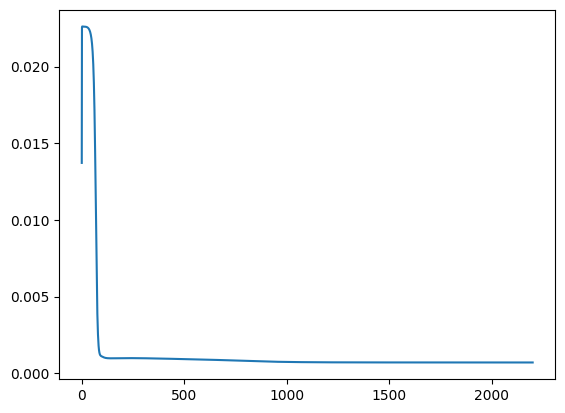

In [14]:
#crear instancia de red neuronal
vehiculos=mlp(4,3,1,1)

#entrenar red neuronal
vehiculos.train(x,y,0.1,2200)

#imprimir
plt.figure(1)
plt.plot(vehiculos.e)
plt.show()

# 5. Evaluación del modelo

ERROR DEL MODELO: [0.07063229]%


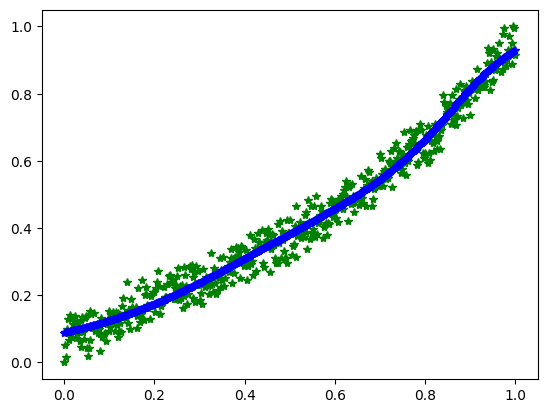

In [15]:
#Inicializar salida del modelo
ym = np.zeros(y.shape)

#inicializar el error del modelo
e=0.0

#Someter red neuronal a datos de entrada
for i in range(x.shape[0]):
    
    #tomar dato i de vector de entradas
    x_in=x[i,:].reshape(1,1)
    
    #someter entrada a red neuronal
    ym[i]=vehiculos.forward(x_in)
    
    #acumular error
    e=e+emc(ym[i],y[i])
    
#promediar error

e=e/x.shape[0]
print("ERROR DEL MODELO: "+str(e*100)+"%")

#Graficar resultados
plt.plot(x, y, '*', color='g')
plt.plot(x, ym, '*', color='b')
plt.show()